# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [242]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [377]:
plot_colors = ['#076B00','#F3E400','#8368CC','#A52A2A','#6699CC','#CC6F02','#8368CC','#A52A2A']
#plot_colors = ['#076B00','#F3E400', '#8368CC',  '#CC6F02', '#6699CC'] # green, purple, blue, orange, yellow
sns.set_palette(plot_colors)


### 1. Load the dataset

In [378]:
# Load files into a pandas dataframe
df = pd.read_csv('data/data_bank_account.csv')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [379]:
# inspect train data
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [380]:
# Check for missing values
print('missing values:', df.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



In [381]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

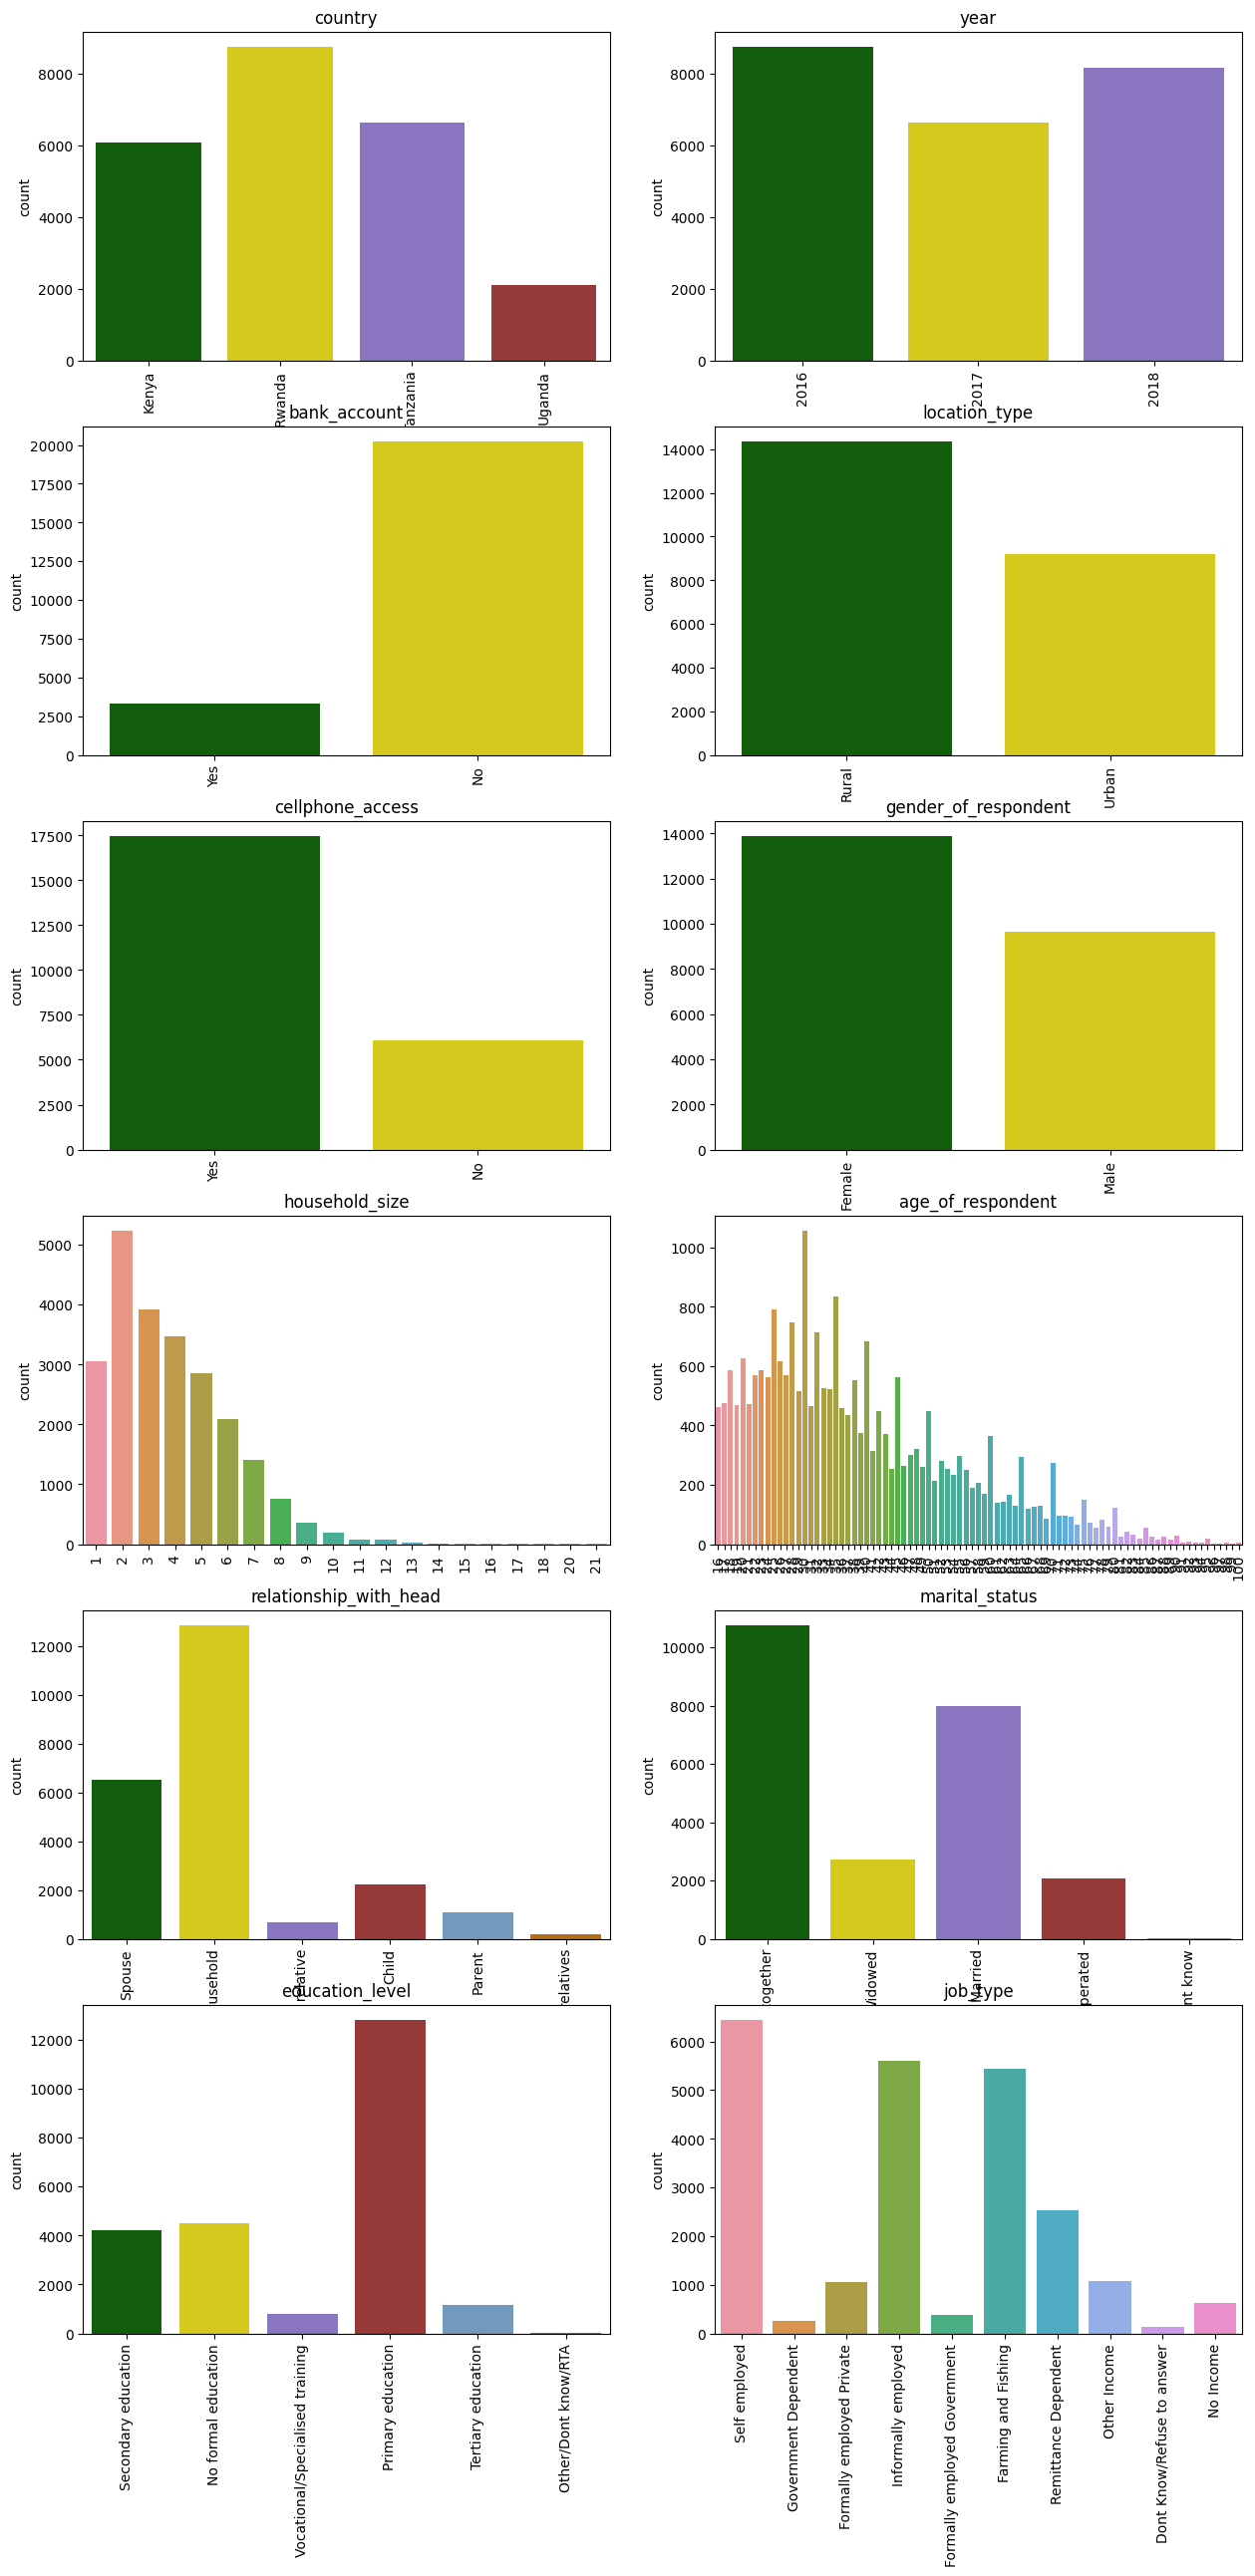

In [382]:
selected_columns = ['country', 'year', 
                    'bank_account', 'location_type',
                    'cellphone_access', 'gender_of_respondent', 
                    'household_size', 'age_of_respondent',
                    'relationship_with_head', 'marital_status',
                    'education_level', 'job_type']
fig,ax = plt.subplots(6,2,figsize=(15,30))
count = 0
for item in selected_columns:
    sns.countplot(data=df, x=item, ax=ax[int(count/2)][count%2]).set(title=item, xlabel='')
    count += 1

for i, ax in enumerate(fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)



In [383]:
df.bank_account.value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [384]:
df.country.value_counts(normalize=True)

country
Rwanda      0.371323
Tanzania    0.281415
Kenya       0.257949
Uganda      0.089313
Name: proportion, dtype: float64

In [385]:
df.country.value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

Splitted into bank account yes/no

<Figure size 640x480 with 0 Axes>

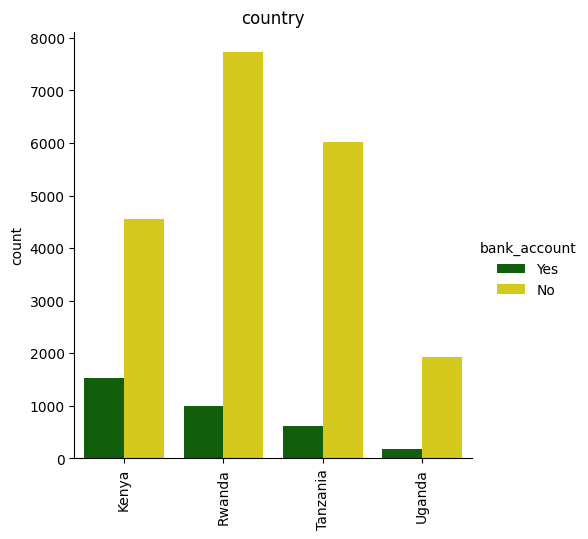

<Figure size 640x480 with 0 Axes>

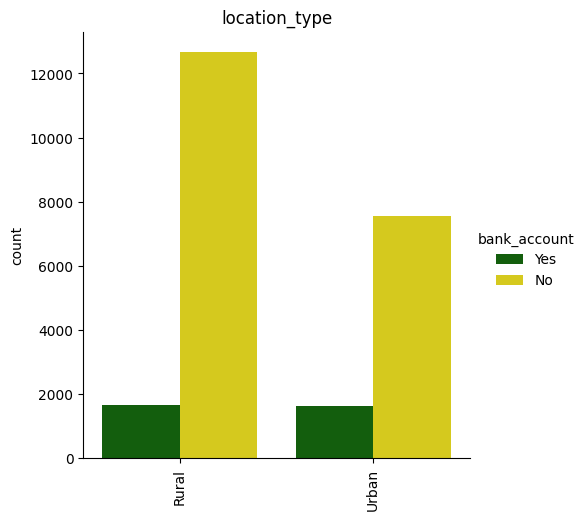

<Figure size 640x480 with 0 Axes>

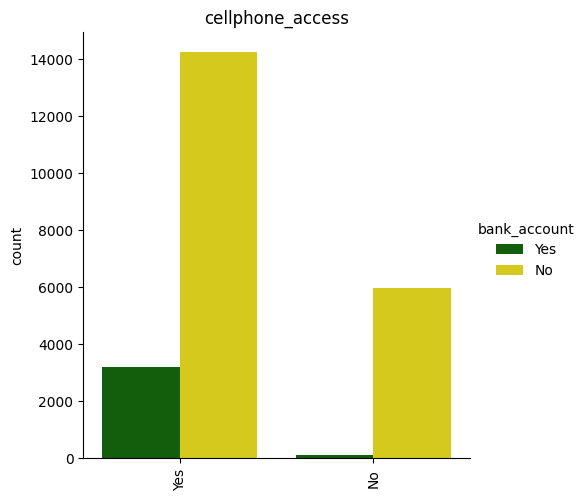

<Figure size 640x480 with 0 Axes>

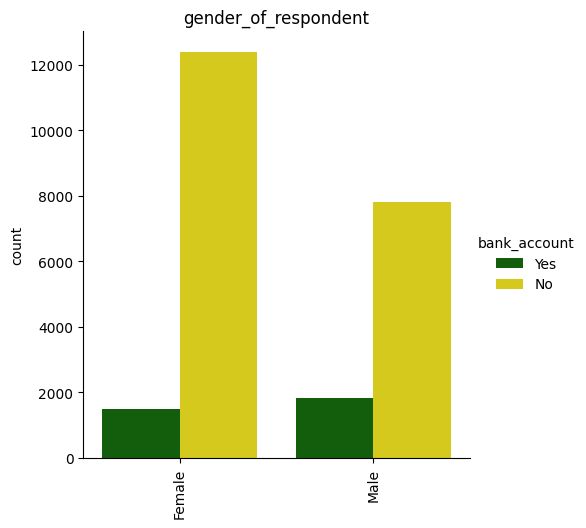

<Figure size 640x480 with 0 Axes>

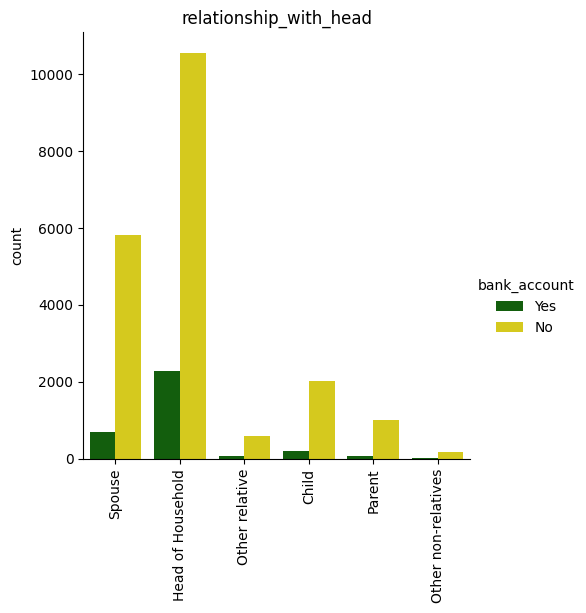

<Figure size 640x480 with 0 Axes>

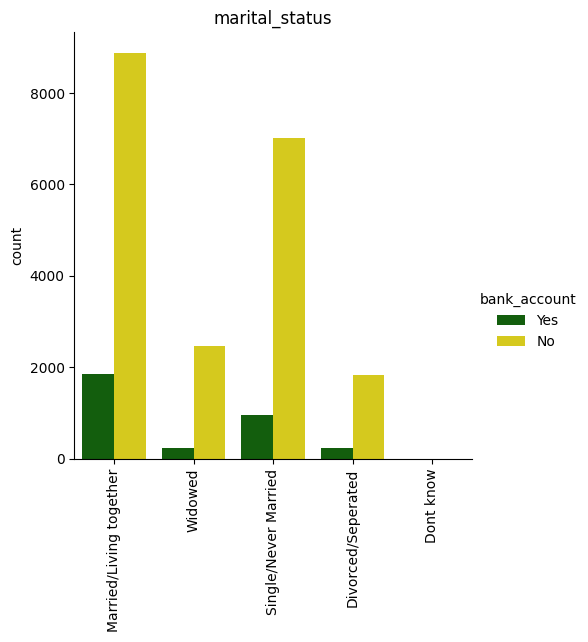

<Figure size 640x480 with 0 Axes>

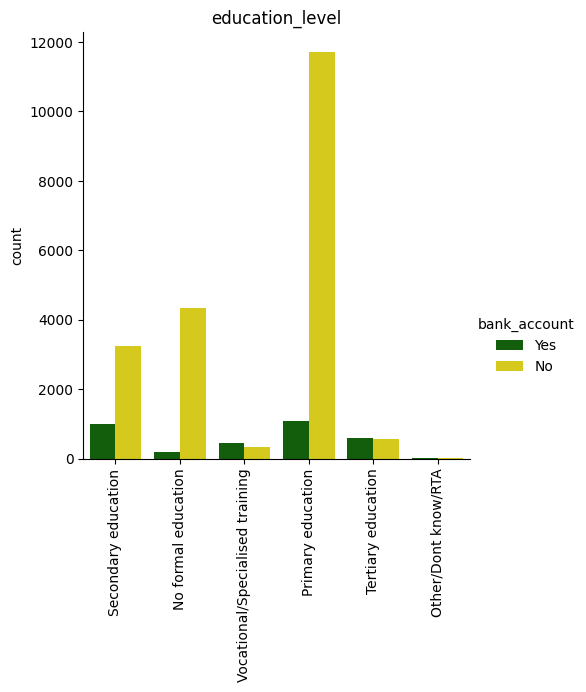

<Figure size 640x480 with 0 Axes>

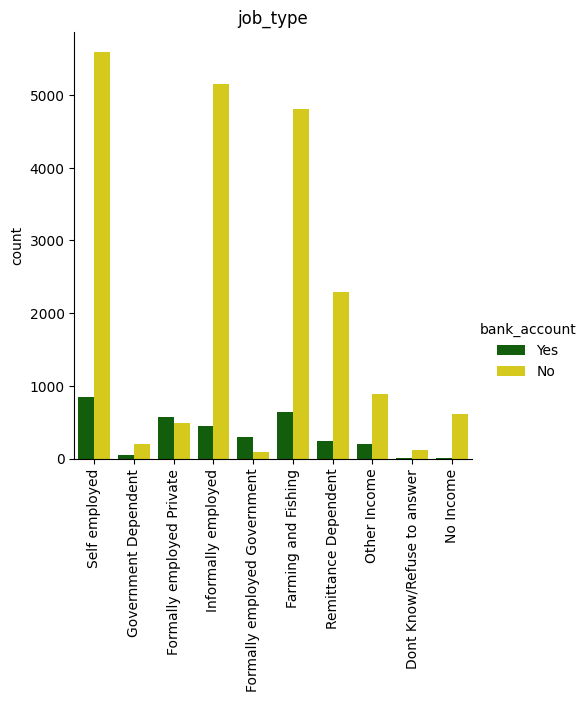

<Figure size 640x480 with 0 Axes>

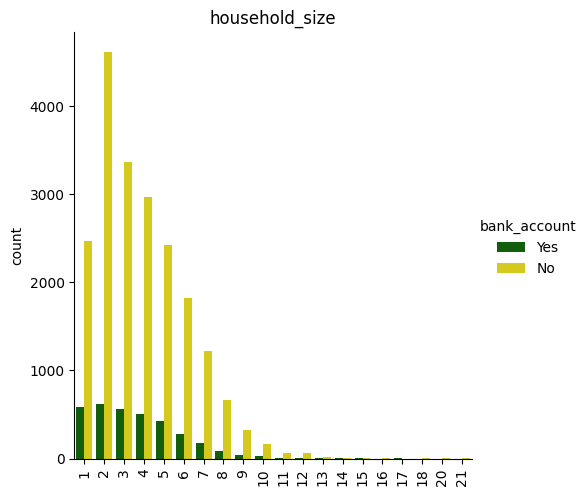

<Figure size 640x480 with 0 Axes>

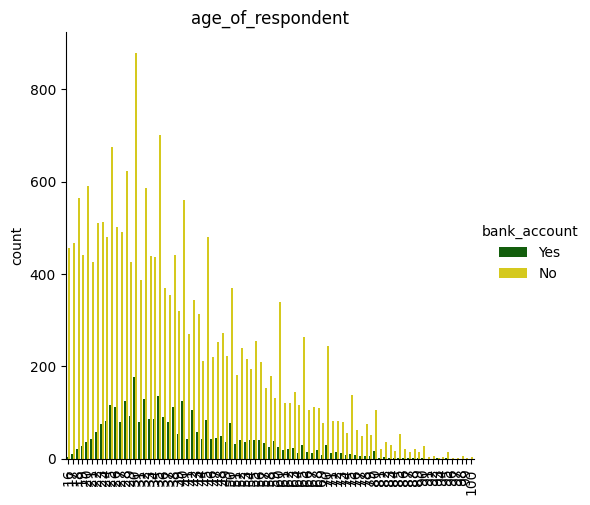

In [386]:
selected_columns = ['country', 'location_type',
                    'cellphone_access', 'gender_of_respondent', 
                    'relationship_with_head', 'marital_status',
                    'education_level', 'job_type',
                    'household_size','age_of_respondent']
count = 0
for item in selected_columns:
    plt.figure()
    g=sns.catplot(data=df, x=item, hue = 'bank_account', kind='count').set(xlabel='', title = item)
    ax = g.facet_axis(0,0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show();
    count += 1


## How much people per country? 

In [387]:
# Load files into a pandas dataframe
country_data = pd.read_csv('data/country_data.csv')
country_data.columns = country_data.columns.str.replace(' ','_')
country_data.columns = country_data.columns.str.lower()

In [388]:
country_data

,country,year,population,gdp_in_billion
0,Kenya,2018,49950000,78
1,Rwanda,2016,11930000,8
2,Tanzania,2017,56270000,47
3,Uganda,2018,41520000,28


In [389]:
df.groupby('country').uniqueid.count()

country
Kenya       6068
Rwanda      8735
Tanzania    6620
Uganda      2101
Name: uniqueid, dtype: int64

In [390]:
# ax2 = sns.barplot(y = country_data['country'], 
#                 x = country_data['population'] 
#                 )
# ax2.set(title = 'Population',
#               xlabel = '',
#               ylabel = '' )

In [391]:
# ax1=sns.barplot(y = df.groupby('country').uniqueid.count().index, 
#                 x = df.groupby('country').uniqueid.count().values 
#                 )
# ax1.set(title = 'Number of respondents',
#               xlabel = '',
#               ylabel = '' )


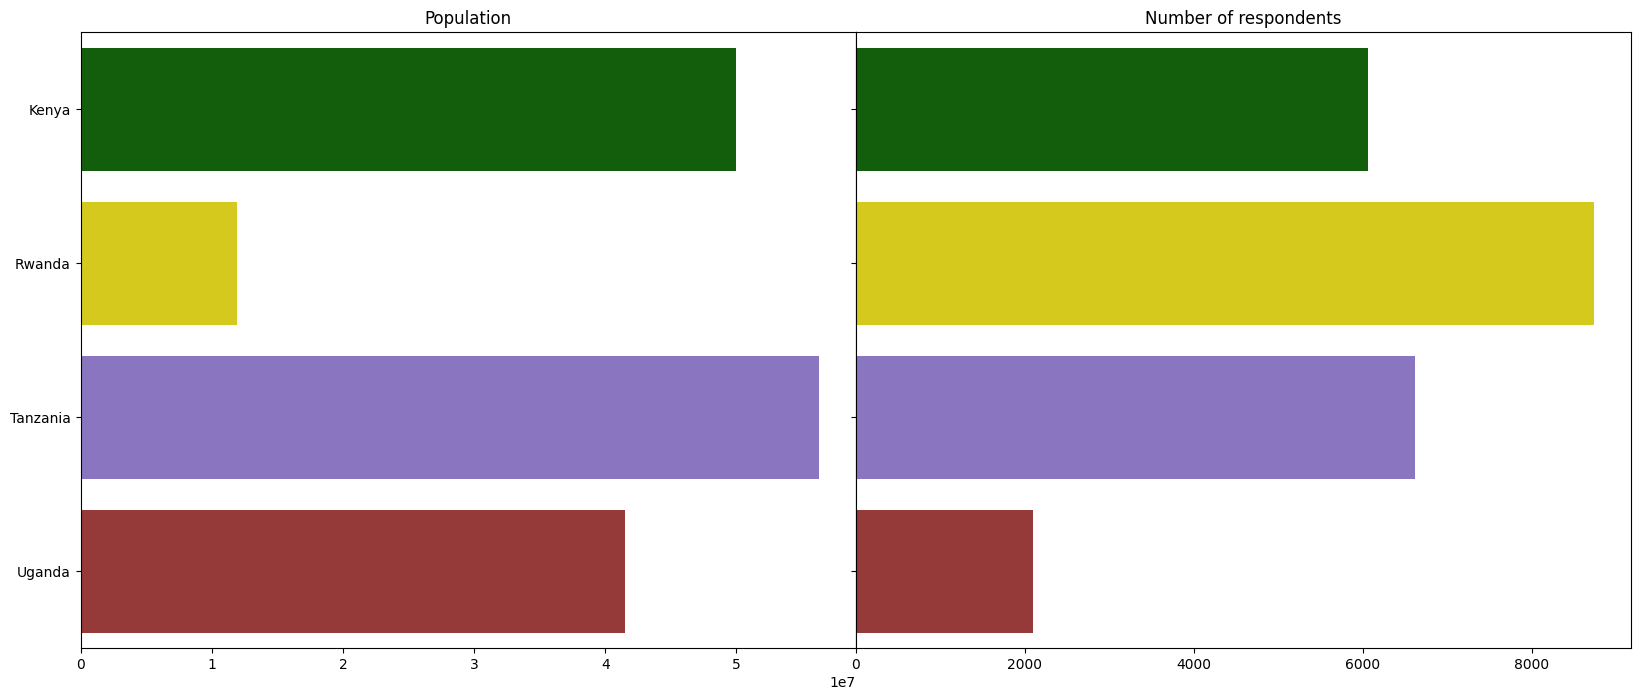

In [392]:
fig,ax = plt.subplots(1,2, sharey=True,figsize=(20,8))
count = 0
#cmap = matplotlib.colors.ListedColormap(plot_colors)
ax1 = sns.barplot(x = country_data['population'],
                  y = country_data['country'],
                  ax=ax[0],
                  )
ax1.set(title = 'Population',
              xlabel = '',
              ylabel = '' )

ax2 = sns.barplot(x = df.groupby('country').uniqueid.count().values,
                  y = df.groupby('country').uniqueid.count().index,
                  ax=ax[1])
ax2.set(title = 'Number of respondents',
              xlabel = '',
              ylabel = '' )

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Split the data into countries

In [393]:
df.groupby('country').bank_account.value_counts()

country   bank_account
Kenya     No              4547
          Yes             1521
Rwanda    No              7732
          Yes             1003
Tanzania  No              6013
          Yes              607
Uganda    No              1920
          Yes              181
Name: count, dtype: int64

In [394]:
country_list = df.country.unique().tolist()
country_list

['Kenya', 'Rwanda', 'Tanzania', 'Uganda']

In [395]:
#test
df.query('country == "Kenya"').bank_account.value_counts(normalize=True)

bank_account
No     0.749341
Yes    0.250659
Name: proportion, dtype: float64

Bank Account Yes/No Pie Chart

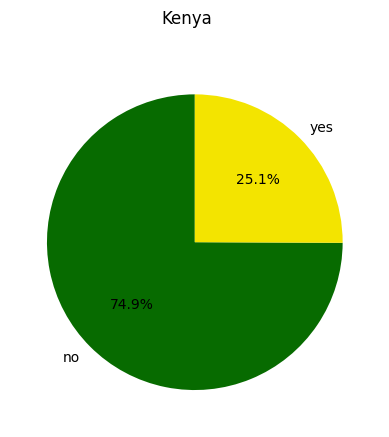

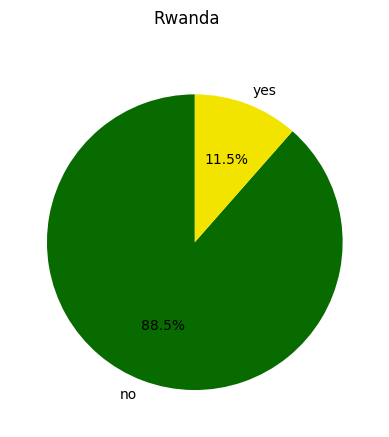

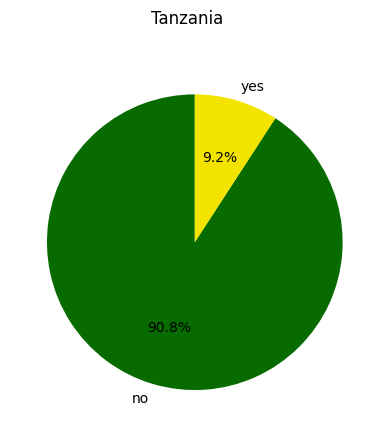

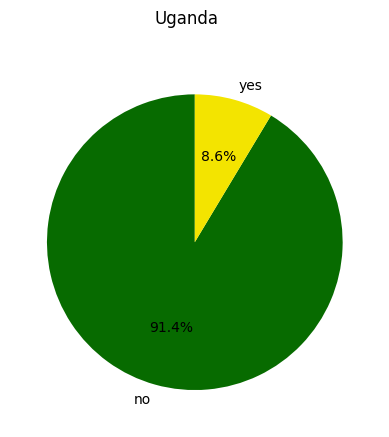

In [396]:
for countr in country_list:
        plt.pie(df.query('country == @countr').bank_account.value_counts(normalize=True),
                labels = ['no', 'yes'],
                autopct='%1.1f%%',
                startangle= 90,
                radius = 1.)
        plt.suptitle(countr)
        picname = 'plots_and_pictures/pie_bank_account_' + countr + '.png'
        plt.savefig(picname, transparent=True)
        #plt.savefig('filename.png', format='png', dpi='600', transparent=True)
        plt.show()

Education Level per Country

In [397]:
# get the education level as list (sorted by value)
edc_lst = df.query('country == "Kenya"').education_level.value_counts(normalize= True).index.tolist()

for countr in country_list:
        g=sns.barplot(y = df.query('country == @countr').education_level.value_counts(normalize=True).index, 
                x = df.query('country == @countr').education_level.value_counts(normalize=True).values*100
                )
        g.set(title = countr,
              xlabel = '%',
              ylabel = '')
        plt.show();

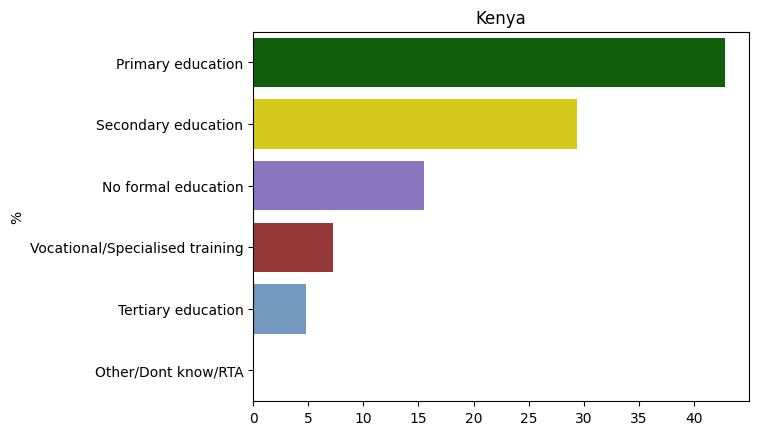

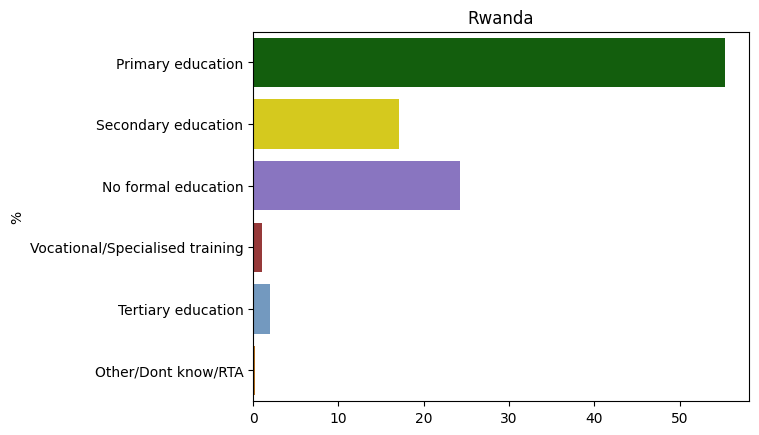

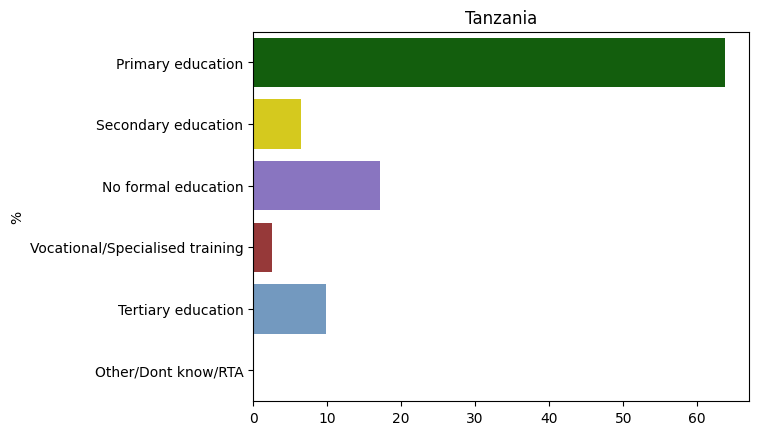

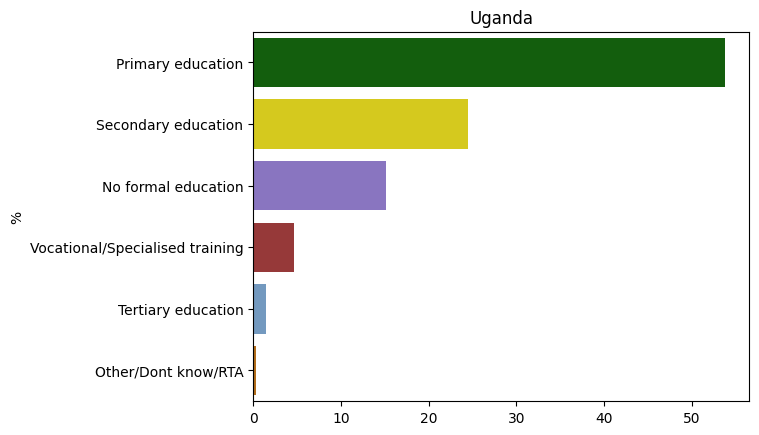

In [398]:
for countr in country_list:
        g=sns.barplot(y = df.query('country == @countr').education_level.value_counts(normalize=True)[edc_lst].index, 
                x = df.query('country == @countr').education_level.value_counts(normalize=True)[edc_lst].values * 100
                )
        g.set(title = countr,
              xlabel = '',
              ylabel = '%')

        plt.show();

for countr in country_list:
        plt.barh(df.query('country == @countr').education_level.value_counts(normalize=True).index, 
                df.query('country == @countr').education_level.value_counts(normalize=True).values,
                #labels = df.query('country == @countr').education_level.value_counts(normalize= True).index.tolist(),
                #colors = colors,
                #autopct='%1.1f%%'
                )
        plt.suptitle(countr)
        plt.show()

Job Type per Country

In [399]:
# test 
df.groupby('country').job_type.value_counts(normalize= True)

country   job_type                    
Kenya     Farming and Fishing             0.265162
          Informally employed             0.233850
          Remittance Dependent            0.195781
          Self employed                   0.157218
          Formally employed Private       0.068556
          Formally employed Government    0.042848
          Other Income                    0.025379
          Government Dependent            0.010712
          Dont Know/Refuse to answer      0.000494
Rwanda    Farming and Fishing             0.438695
          Informally employed             0.329479
          Remittance Dependent            0.075787
          Self employed                   0.069262
          Other Income                    0.036978
          Formally employed Private       0.018432
          Formally employed Government    0.014539
          Government Dependent            0.010418
          Dont Know/Refuse to answer      0.006411
Tanzania  Self employed                   0

In [400]:
# get the education level as list (sorted by value)
#job_lst = df.query('country == "Kenya"').job_type.value_counts(normalize= True).index.tolist()

In [401]:
# for countr in country_list:
#         g=sns.barplot(y = df.query('country == @countr').job_type.value_counts(normalize=True)[job_lst].index, 
#                 x = df.query('country == @countr').job_type.value_counts(normalize=True)[job_lst].values
#                 )
#         g.set(title = countr,
#               ylabel = '')

#         plt.show();

die Job-Typen sind nicht in allen Ländern gleich. Das macht es schwierig sie in gleicher Weise dazustellen.   
Ich werde es auf eine andere Weise versuchen:

In [402]:
location_dummies = pd.get_dummies(df.job_type, prefix='job')
location_dummies.columns = location_dummies.columns.str.replace(' ','_')
location_dummies.columns = location_dummies.columns.str.replace('/','_or_')
location_dummies.columns = location_dummies.columns.str.lower()
# change bool to int
location_dummies[location_dummies.columns.to_list()] = location_dummies[location_dummies.columns.to_list()].astype(int)
location_dummies.head(10)

,job_dont_know_or_refuse_to_answer,job_farming_and_fishing,job_formally_employed_government,job_formally_employed_private,job_government_dependent,job_informally_employed,job_no_income,job_other_income,job_remittance_dependent,job_self_employed
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1
7,0,0,1,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0


In [403]:
location_dummies.sum()

job_dont_know_or_refuse_to_answer     126
job_farming_and_fishing              5441
job_formally_employed_government      387
job_formally_employed_private        1055
job_government_dependent              247
job_informally_employed              5597
job_no_income                         627
job_other_income                     1080
job_remittance_dependent             2527
job_self_employed                    6437
dtype: int64

In [404]:
#loaction_df = location_dummies.join(df['country'])
#loaction_df.head() 
#loaction_df.groupby('country').sum()

location_sum = location_dummies.join(df['country']).groupby('country').sum()
location_sum = location_sum.transpose()
location_sum

country,Kenya,Rwanda,Tanzania,Uganda
job_dont_know_or_refuse_to_answer,3,56,0,67
job_farming_and_fishing,1609,3832,0,0
job_formally_employed_government,260,127,0,0
job_formally_employed_private,416,161,370,108
job_government_dependent,65,91,84,7
job_informally_employed,1419,2878,1300,0
job_no_income,0,0,380,247
job_other_income,154,323,35,568
job_remittance_dependent,1188,662,677,0
job_self_employed,954,605,3774,1104


Now I have a table with the number ob jobstype per country.

In [405]:
location_sum.index

Index(['job_dont_know_or_refuse_to_answer', 'job_farming_and_fishing',
       'job_formally_employed_government', 'job_formally_employed_private',
       'job_government_dependent', 'job_informally_employed', 'job_no_income',
       'job_other_income', 'job_remittance_dependent', 'job_self_employed'],
      dtype='object')

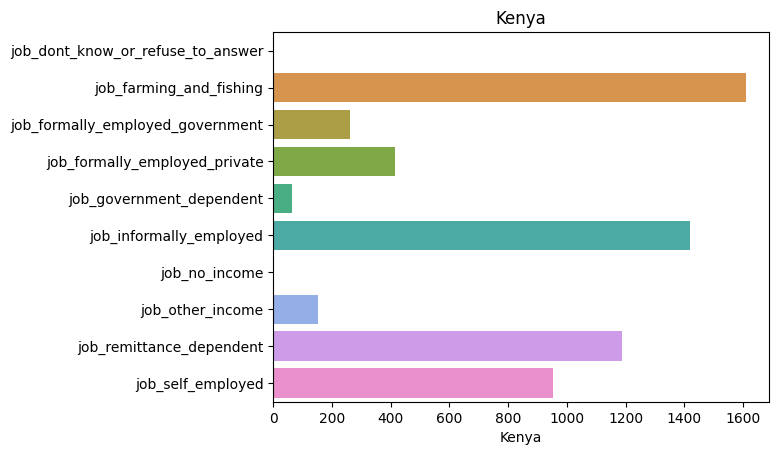

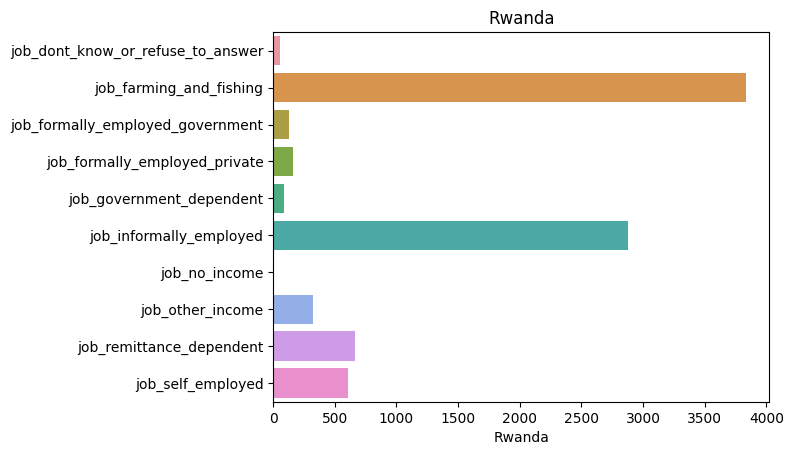

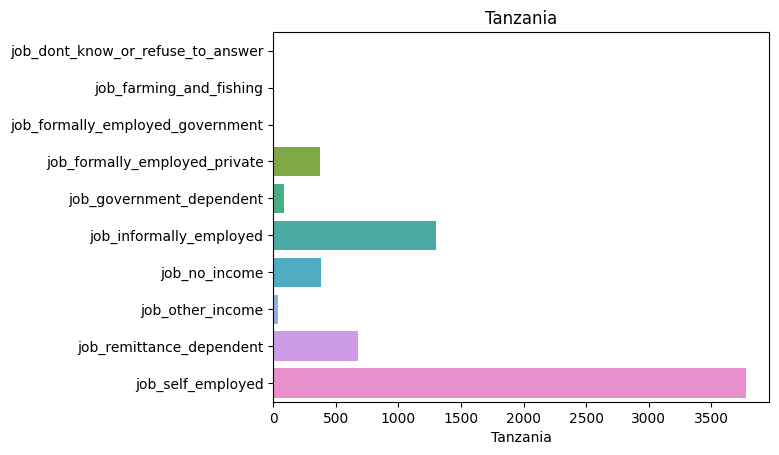

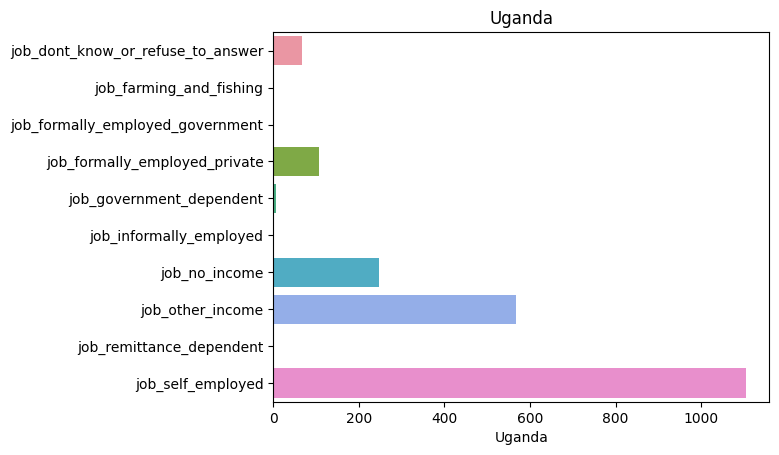

In [406]:
for countr in country_list:
        g=sns.barplot(y = location_sum.index, 
                x = location_sum[countr],
                #color='steelblue'
                )
        g.set(title = countr,
              ylabel = '')

        plt.show();

## Location Type

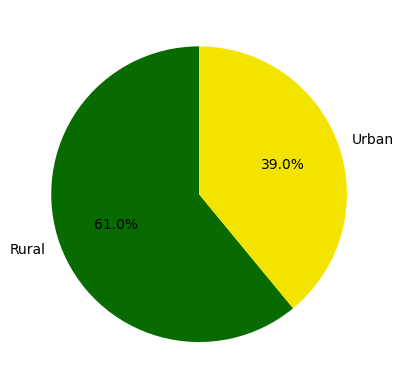

In [407]:
plt.pie(df.location_type.value_counts(normalize=True),
                labels = ['Rural', 'Urban'],
                autopct='%1.1f%%',
                startangle= 90,
                radius = 1.)
plt.show()

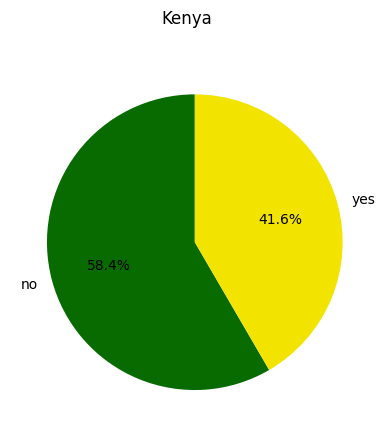

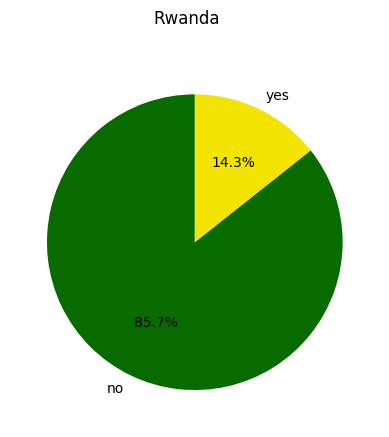

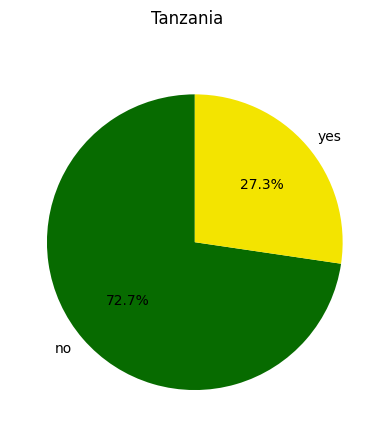

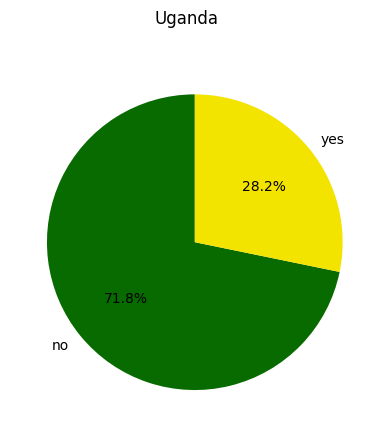

In [408]:
colors = sns.color_palette('tab10')
for countr in country_list:
        plt.pie(df.query('country == @countr').location_type.value_counts(normalize=True),
                labels = ['no', 'yes'],
                autopct='%1.1f%%',
                startangle= 90,
                radius = 1.)
        plt.suptitle(countr)
        picname = 'plots_and_pictures/pie_bank_account_' + countr + '.png'
        plt.savefig(picname, transparent=True)
        #plt.savefig('filename.png', format='png', dpi='600', transparent=True)
        plt.show()

## Household Size

In [409]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [410]:
df.household_size.describe()

count    23524.000000
mean         3.797483
std          2.227613
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

In [411]:
#df.groupby('household_size').household_size.count()

In [412]:
#df.query('bank_account == "Yes"').groupby('household_size').household_size.count()

In [413]:
household_join = pd.concat([df.groupby('household_size').household_size.count(),
                            df.query('bank_account == "Yes"').groupby('household_size').household_size.count()],
                            axis=1)
household_join.fillna(0, inplace=True)
household_join.drop(index=17, axis=0, inplace=True)
household_join

,household_size,household_size
household_size,,
1,3057,584.0
2,5229,619.0
3,3920,559.0
4,3474,501.0
5,2853,427.0
6,2096,277.0
7,1400,177.0
8,751,86.0
9,363,37.0


In [414]:
#household_join.iloc[:,0]/household_join.iloc[:,1]

In [415]:
household_join['account_rate'] = (household_join.iloc[:,1]/household_join.iloc[:,0])*100
household_join

,household_size,household_size,account_rate
household_size,,,
1,3057,584.0,19.103696
2,5229,619.0,11.837828
3,3920,559.0,14.260204
4,3474,501.0,14.421416
5,2853,427.0,14.966702
6,2096,277.0,13.215649
7,1400,177.0,12.642857
8,751,86.0,11.451398
9,363,37.0,10.192837


(0.0, 100.0)

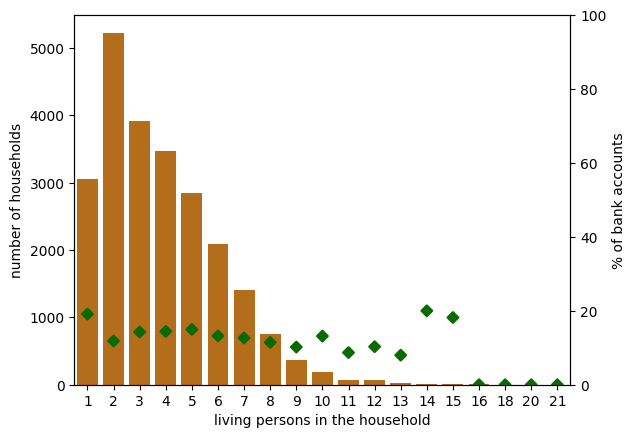

In [416]:
ax1 = sns.barplot(data = household_join,
             x = household_join.index,
             y = household_join.iloc[:,0],
             color='#CC6F02'
             )
ax1.set_xlabel('living persons in the household')
ax1.set_ylabel('number of households')
ax2 = ax1.twinx()
sns.pointplot(data = household_join,
             x = household_join.index,
             y = 'account_rate',
             markers='D',
             scale= 0.8,
             linestyles= '',
             color='#076B00'
             )
ax2.set_ylabel('% of bank accounts')
ax2.set_ylim(0, 100)

The same now for Age of respondent

In [417]:
df.age_of_respondent.describe()

count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

In [418]:
age_join = pd.concat([df.groupby('age_of_respondent').age_of_respondent.count(),
                            df.query('bank_account == "Yes"').groupby('age_of_respondent').age_of_respondent.count()],
                            axis=1)
age_join.fillna(0, inplace=True)
age_join

,age_of_respondent,age_of_respondent
age_of_respondent,,
16,462,5.0
17,477,10.0
18,585,21.0
19,470,28.0
20,626,36.0
...,...,...
96,3,0.0
97,1,0.0
98,6,0.0


In [419]:
age_join['account_rate'] = (age_join.iloc[:,1]/age_join.iloc[:,0])*100
age_join

,age_of_respondent,age_of_respondent,account_rate
age_of_respondent,,,
16,462,5.0,1.082251
17,477,10.0,2.096436
18,585,21.0,3.589744
19,470,28.0,5.957447
20,626,36.0,5.750799
...,...,...,...
96,3,0.0,0.000000
97,1,0.0,0.000000
98,6,0.0,0.000000


(0.0, 100.0)

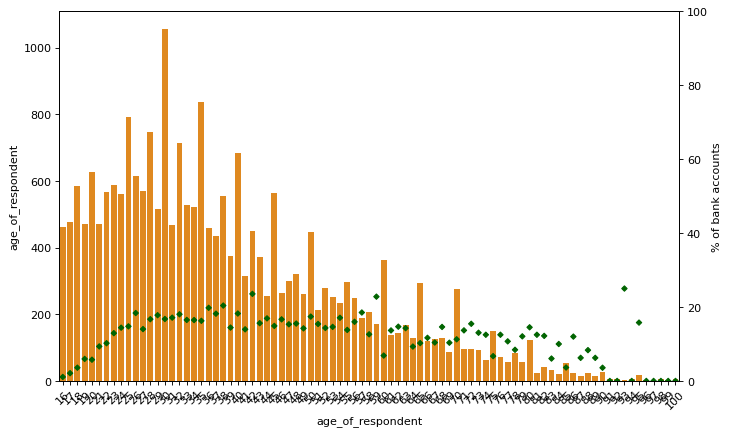

In [430]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(10, 6), dpi=80)
ax1 = sns.barplot(data = age_join,
             x = age_join.index,
             y = age_join.iloc[:,0],
             color='darkorange')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
#ax1.set_xticks(np.arange(15, 101, 5))
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
#ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax1.set_xticks()
ax2 = ax1.twinx()
sns.pointplot(data = age_join,
             x = age_join.index,
             y = 'account_rate',
             markers= 'D',
             scale= 0.5,
             linestyles= '',
             color='darkgreen')
ax2.set_ylabel('% of bank accounts')
ax2.set_ylim(0, 100)

Education Level allgemein

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [ ]:
edu_join = pd.concat([df.groupby('education_level').education_level.count(),
                            df.query('bank_account == "Yes"').groupby('education_level').education_level.count()],
                            axis=1)
edu_join.fillna(0, inplace=True)
edu_join

,education_level,education_level
education_level,,
No formal education,4515,176
Other/Dont know/RTA,35,11
Primary education,12791,1093
Secondary education,4223,983
Tertiary education,1157,591
Vocational/Specialised training,803,458


In [ ]:
edu_join['account_rate'] = (edu_join.iloc[:,1]/edu_join.iloc[:,0])*100
edu_join

,education_level,education_level,account_rate
education_level,,,
No formal education,4515,176,3.898117
Other/Dont know/RTA,35,11,31.428571
Primary education,12791,1093,8.545071
Secondary education,4223,983,23.277291
Tertiary education,1157,591,51.080380
Vocational/Specialised training,803,458,57.036115


/var/folders/0r/sbr_hnhj2j39nld23c8vxg9w0000gn/T/ipykernel_35757/3225611223.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation = 90)


[Text(0.0, 0, '0'),
 Text(10.0, 0, '10'),
 Text(20.0, 0, '20'),
 Text(30.0, 0, '30'),
 Text(40.0, 0, '40'),
 Text(50.0, 0, '50'),
 Text(60.0, 0, '60')]

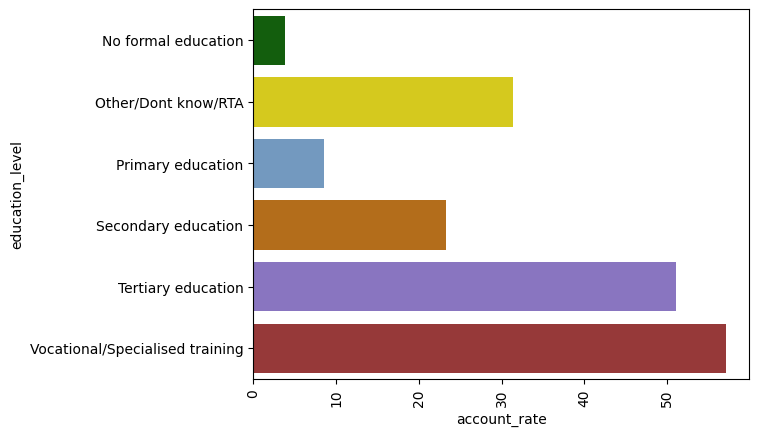

In [ ]:
g=sns.barplot(y = edu_join.index,
            x = edu_join.account_rate)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)

## Cellphone Access

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

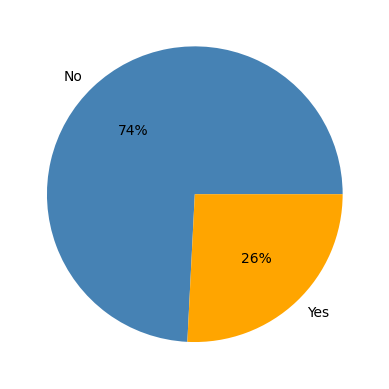

In [ ]:
plt.pie(df.cellphone_access.value_counts(normalize=True),
                labels = ['No', 'Yes'],
                colors = ['steelblue', 'orange'],
                autopct='%1.0f%%',
                startangle= 0,
                radius = 1.)
plt.show()

with bank account

In [ ]:
df.query('cellphone_access == "Yes"').bank_account.value_counts(normalize=True)

bank_account
No     0.816203
Yes    0.183797
Name: proportion, dtype: float64

Remember: 18% is the same for all bank accounts

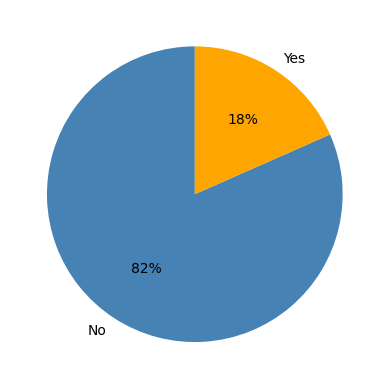

In [ ]:
plt.pie(df.query('cellphone_access == "Yes"').bank_account.value_counts(normalize=True),
                labels = ['No', 'Yes'],
                colors = ['steelblue', 'orange'],
                autopct='%1.0f%%',
                startangle= 90,
                radius = 1.)
plt.show()

In [ ]:
df.query('cellphone_access == "No"').bank_account.value_counts(normalize=True)

bank_account
No     0.982867
Yes    0.017133
Name: proportion, dtype: float64

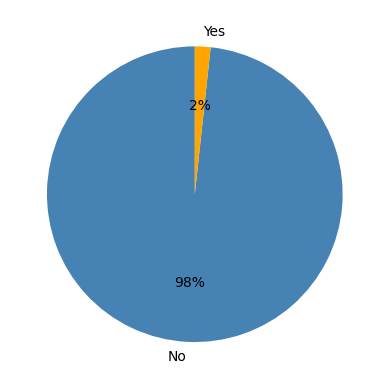

In [ ]:
plt.pie(df.query('cellphone_access == "No"').bank_account.value_counts(normalize=True),
                labels = ['No', 'Yes'],
                colors = ['steelblue', 'orange'],
                autopct='%1.0f%%',
                startangle= 90,
                radius = 1.)
plt.show()

Show in a Matrix

In [ ]:
phone_yes = pd.Series(df.query('cellphone_access == "Yes"').bank_account.value_counts(normalize=False), name='Phone_Yes')

In [ ]:
phone_no = pd.Series(df.query('cellphone_access == "No"').bank_account.value_counts(normalize=False), name='Phone_No')

In [ ]:
phone_yes

bank_account
No     14246
Yes     3208
Name: Phone_Yes, dtype: int64

In [441]:
phone_matrix = pd.concat([phone_no, phone_yes], axis = 1)
#phone_matrix = phone_matrix.to_numpy()
phone_matrix

,Phone_No,Phone_Yes
bank_account,,
No,5966,14246
Yes,104,3208


<Axes: ylabel='bank_account'>

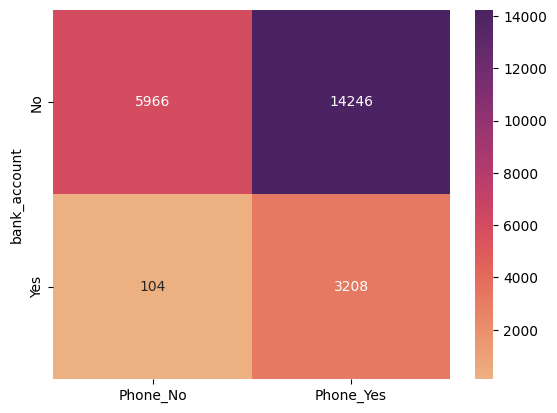

In [452]:
sns.heatmap(phone_matrix, annot= True, fmt=".0f", cmap="flare")

In [456]:
#phone_sum = phone_matrix.sum()[0] + phone_matrix.sum()[1]

In [454]:
phone_matrix_perc = (phone_matrix / (phone_matrix.sum()[0] + phone_matrix.sum()[1])) * 100
phone_matrix_perc

,Phone_No,Phone_Yes
bank_account,,
No,25.361333,60.559429
Yes,0.442102,13.637137


<Axes: ylabel='bank_account'>

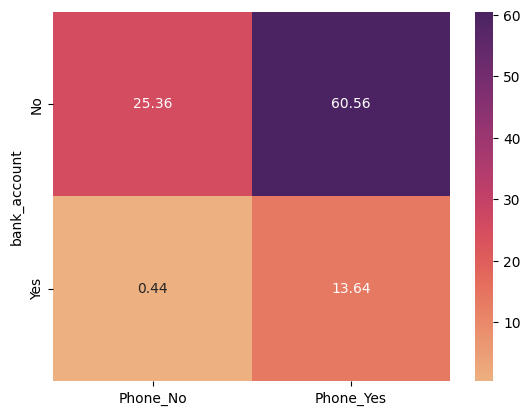

In [455]:
sns.heatmap(phone_matrix_perc, annot= True, fmt=".2f", cmap="flare")